In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error

In [3]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

In [4]:
X_train = train_data.drop(["anycondition_number"], axis = 1)
y_train = train_data["anycondition_number"]

X_test = test_data.drop(["anycondition_number"], axis = 1)
y_test = test_data["anycondition_number"]

In [7]:
# Entrenamos un modelo de regresión lineal sin regularización
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

In [9]:
# Creamos una función que mida el error en ambos conjuntos y la diferencia
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [10]:
get_metrics(yhat_test, y_test, yhat_train, y_train)

,R2,Median AE,MAPE
Train set,1.0,4.547474e-12,1.662637e-13
Test set,1.0,5.456968e-12,1.595025e-13
Diferencia,0.0,9.094947e-13,-6.761140e-15


In [11]:
print(f'Coeficientes: {model.coef_}')

Coeficientes: [-1.15433022e-01  1.28649112e-02  1.30117211e-02  1.52560200e-02
  1.50754584e-02  1.33772293e-02  1.31459596e-02  1.06220318e-02
  6.24285360e-03  3.71225792e-03 -3.47388361e-12  1.27829927e-02
  3.02494456e-11  3.88075794e-11  3.63341615e-11  4.07185367e-11
  7.77226692e-13  4.46360153e-12  4.55158847e-12  2.32745165e-12
  2.84908006e-12  5.95612848e-13 -3.98413146e-13 -1.16512543e-10
  6.15616438e-12  2.10276603e-11  1.68361761e-11  1.00000000e+00
 -2.30769947e-13  1.64793527e-12 -1.71562308e-11]


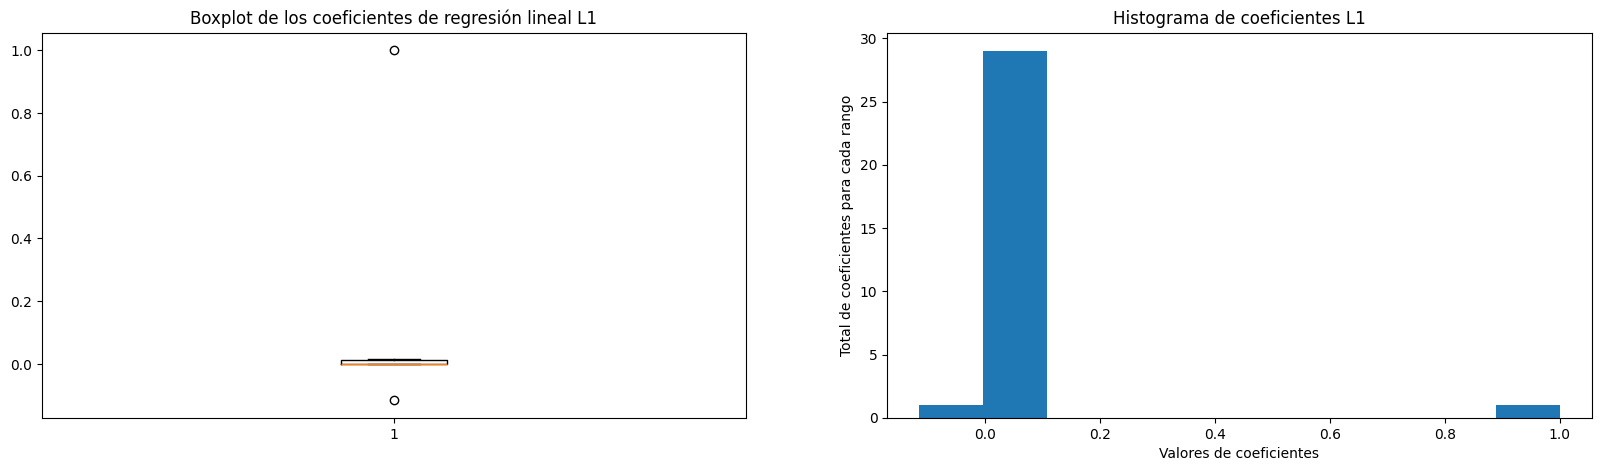

In [13]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.boxplot(model.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal L1')
plt.subplot(1, 2, 2)
plt.hist(model.coef_,10)
plt.xlabel('Valores de coeficientes')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes L1')
plt.show()